In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("lending_club_loan_two.csv")

In [3]:
df2 = pd.read_csv("lending_club_info.csv")
info = lambda x = df2: x

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [5]:
df.drop("grade", axis=1, inplace=True)

## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   emp_title             373103 non-null  object 
 6   emp_length            377729 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  title                 394275 non-null  object 
 14  dti                   396030 non-null  float64
 15  

In [7]:
def percent_missing(df):
    percent_nan = 100*df.isnull().sum() /len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan


In [8]:
pm = percent_missing(df)

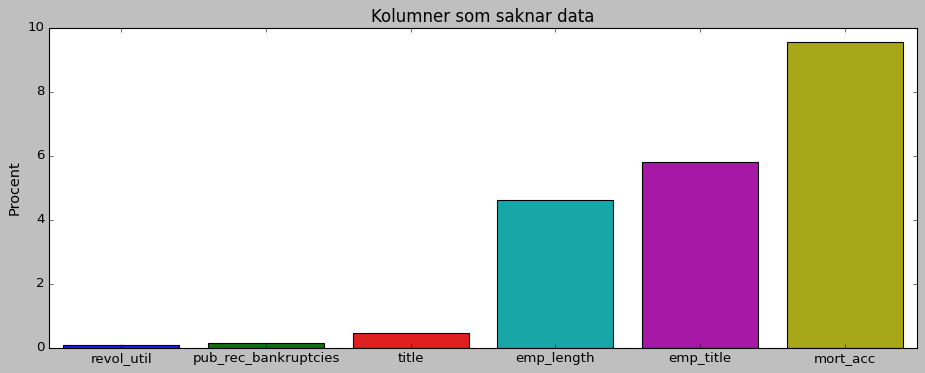

In [9]:
plt.style.use("classic")
plt.figure(figsize=(14,5))
sns.barplot(x=pm.index, y=pm.values)
plt.title("Kolumner som saknar data", fontsize="15")
plt.ylabel("Procent", fontsize=13)
plt.show()

### Vad har de kolumner som saknar data för datatyper?

In [10]:
dtypes_features_missing_data = [df[feature].dtypes for feature in pm.index]
print(*dtypes_features_missing_data, sep=",")

float64,float64,object,object,object,float64


### Vilka unika värden finns i de av dessa kolumner som är string baserade?

In [11]:
str_based_cols_unique_values = [df[feature].unique() for feature in ["title", "emp_length", "emp_title"]]

In [12]:
str_based_cols_unique_values[0]

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [13]:
str_based_cols_unique_values[1]

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [14]:
str_based_cols_unique_values[2]

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

### Hur många rader och kolumner

In [15]:
df.shape

(396030, 26)

### Korrelation mellan numeriska features

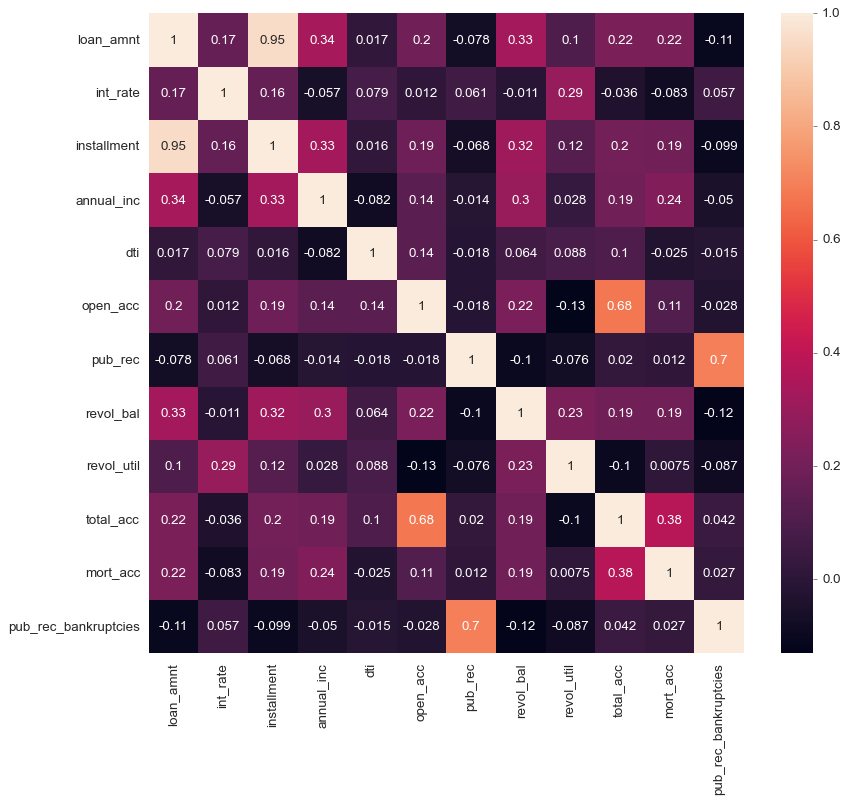

In [16]:
sns.set_style("white")
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

### Statistik

In [17]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


### Target

In [18]:
df["loan_status"].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

**Binär klassifikation då det är 2 st unika värden. Det som modellen ska förutse är vilken status en kund kommer att ha**

### Visualiseringar

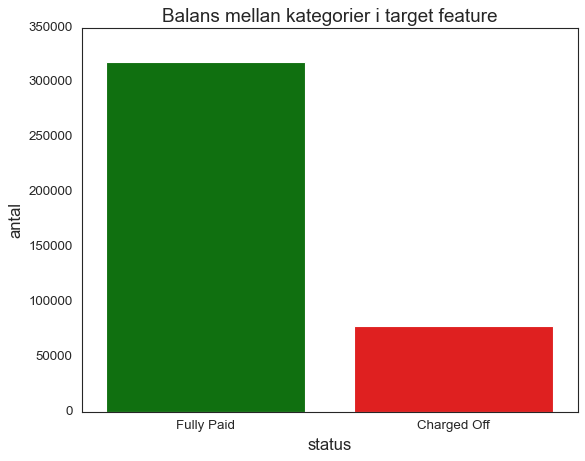

In [19]:
sns.countplot(data=df, x="loan_status", palette=["green", "red"])
plt.xlabel("status", fontsize=15)
plt.ylabel("antal", fontsize=15)
plt.title("Balans mellan kategorier i target feature", fontsize=17)
plt.show()

**Obalanserat, men det är ett stort dataset så det kommer ändå att finnas många rader att träna och testa modellen på**

In [20]:
with_revol_util = df.corr(numeric_only=True)["revol_util"].drop("revol_util")
with_pub_rec = df.corr(numeric_only=True)["pub_rec_bankruptcies"].drop("pub_rec_bankruptcies")
with_mort_acc = df.corr(numeric_only=True)["mort_acc"].drop("mort_acc")

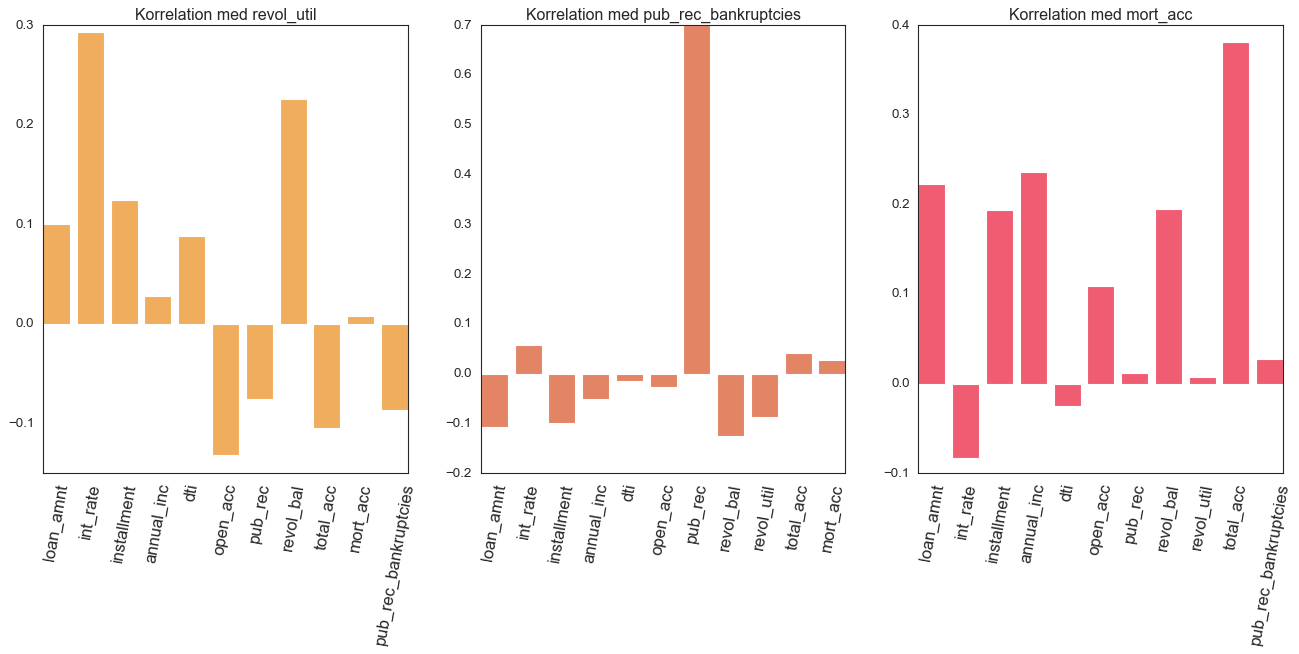

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,7))

ax[0].bar(with_revol_util.index, with_revol_util.values, color="#F0AD5D")
ax[1].bar(with_pub_rec.index, with_pub_rec.values, color="#E38464")
ax[2].bar(with_mort_acc.index, with_mort_acc.values, color="#F05D72")

ax[0].tick_params(axis="x", labelrotation=80, labelsize=15)
ax[1].tick_params(axis="x", labelrotation=80, labelsize=15)
ax[2].tick_params(axis="x", labelrotation=80, labelsize=15)

ax[0].set_title("Korrelation med revol_util")
ax[1].set_title("Korrelation med pub_rec_bankruptcies")
ax[2].set_title("Korrelation med mort_acc")

plt.show()

In [22]:
df["loan_status"].replace("Fully Paid", 0, inplace=True)
df["loan_status"].replace("Charged Off", 1, inplace=True)
df["loan_status"].unique()

array([0, 1], dtype=int64)

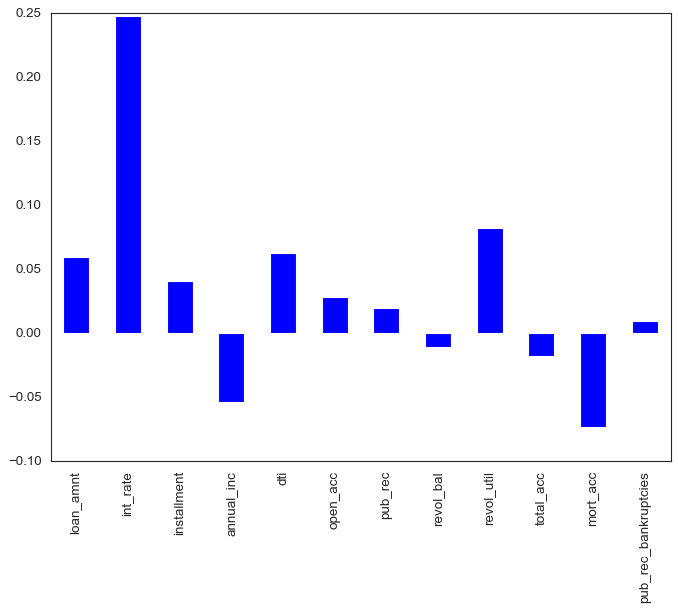

In [23]:
plt.figure(figsize=(10,7))
df.corr(numeric_only=True)["loan_status"].drop("loan_status").plot(kind="bar")
plt.show()

### Missing data

In [24]:
percent_missing(df)

revol_util              0.069692
pub_rec_bankruptcies    0.135091
title                   0.443148
emp_length              4.621115
emp_title               5.789208
mort_acc                9.543469
dtype: float64

**Jag slänger alla rader i kolumner där mindre än 6% av raderna saknar data**

In [25]:
df.dropna(subset=["revol_util", "pub_rec_bankruptcies", "title", "emp_length", "emp_title"], inplace=True)

In [26]:
percent_missing(df)

mort_acc    9.377209
dtype: float64

#### Hitta fill values för mort_acc

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [28]:
def knn(df, target):
    X = df.drop(target, axis=1)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

    scaler = StandardScaler()
    scaler.fit(X_train)
    scaled_X_train = scaler.transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    knn_model = KNeighborsClassifier()

    grid_model = GridSearchCV(estimator=knn_model, param_grid={"n_neighbors": [5,10,15]}, cv=5)

    grid_model.fit(scaled_X_train, y_train)

    y_pred = grid_model.predict(scaled_X_test)

    return classification_report(y_true=y_test, y_pred=y_pred)


In [29]:
def log_reg(df, target):
    X = df.drop(target, axis=1)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

    scaler = StandardScaler()
    scaler.fit(X_train)
    scaled_X_train = scaler.transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    base_log_model = LogisticRegression(solver="saga", multi_class="ovr", max_iter=100000)

    grid_model = GridSearchCV(estimator=base_log_model, param_grid={"C": [0.5,1,2,10]}, cv=5)

    grid_model.fit(scaled_X_train, y_train)

    y_pred = grid_model.predict(scaled_X_test)

    return classification_report(y_true=y_test, y_pred=y_pred), grid_model

In [30]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B4,Marketing,10+ years,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


**Skapar ett sub-dataset för att använda till att träna och testa ml modell**

In [31]:
df_str = df[["term", "verification_status"]]
df_num = df.select_dtypes(exclude="object")
df_to_train_models_on = pd.concat([df_str,df_num], axis=1)
df_to_train_models_on = pd.get_dummies(df_to_train_models_on)
df_to_train_models_on = df_to_train_models_on.dropna()

In [32]:
# print(knn(sample, "mort_acc"))

**Tränar och testar modellen på det nya datasetet med logistic regression**

In [33]:
result, model = log_reg(df_to_train_models_on.head(10000), "mort_acc")

C:\Users\chris\.virtualenvs\deepLearning\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\chris\.virtualenvs\deepLearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chris\.virtualenvs\deepLearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chris\.virtualenvs\deepLearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Prec

**Klassifikations rapporten visar att modellen är hyfsad på att identifiera de användare som har 0.0**

In [34]:
print(result)

              precision    recall  f1-score   support

         0.0       0.46      0.93      0.62       582
         1.0       0.16      0.06      0.09       266
         2.0       0.15      0.07      0.09       227
         3.0       0.18      0.10      0.13       136
         4.0       0.11      0.05      0.07       105
         5.0       0.22      0.03      0.05        69
         6.0       0.00      0.00      0.00        56
         7.0       0.00      0.00      0.00        29
         8.0       0.00      0.00      0.00        16
         9.0       0.00      0.00      0.00         9
        11.0       0.00      0.00      0.00         1
        12.0       0.00      0.00      0.00         3
        22.0       0.00      0.00      0.00         1

    accuracy                           0.39      1500
   macro avg       0.10      0.09      0.08      1500
weighted avg       0.26      0.39      0.29      1500



**Få fram fill till mort acc**

In [35]:
# Sätter samman numeriska och string baserade kolumner (Urval)
df_to_get_fill_for_mort_acc = pd.concat([df_str,df_num], axis=1)
# Skaffar dummies till de string-baserade kolumnerna
df_to_get_fill_for_mort_acc = pd.get_dummies(df_to_get_fill_for_mort_acc)
# Datasetet blir här till de rader där mort_acc saknar värde. Det är till dessa rader vi ska hitta nya värden
df_to_get_fill_for_mort_acc = df_to_get_fill_for_mort_acc[df_to_get_fill_for_mort_acc["mort_acc"].isnull()]

In [36]:
df_to_get_fill_for_mort_acc

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,term_ 36 months,term_ 60 months,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
22,4200.0,6.99,129.67,24000.0,0,4.80,6.0,0.0,0.0,0.0,7.0,NaN,0.0,1,0,1,0,0
25,6000.0,11.36,197.47,46680.0,1,6.56,9.0,0.0,4370.0,40.1,10.0,NaN,0.0,1,0,1,0,0
32,3000.0,6.03,91.31,64000.0,0,3.81,6.0,0.0,4912.0,13.4,18.0,NaN,0.0,1,0,0,1,0
41,28000.0,19.91,312.04,52000.0,1,20.70,10.0,0.0,29178.0,87.6,16.0,NaN,0.0,0,1,0,0,1
62,5000.0,10.39,118.45,66000.0,0,1.56,12.0,0.0,15807.0,20.0,17.0,NaN,0.0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395991,5600.0,9.63,179.73,54000.0,0,6.84,9.0,0.0,2776.0,33.0,21.0,NaN,0.0,1,0,0,0,1
395995,10000.0,10.25,323.85,55000.0,0,18.59,7.0,0.0,5571.0,42.2,20.0,NaN,0.0,1,0,1,0,0
396016,3000.0,5.42,90.48,70000.0,0,13.94,9.0,0.0,4062.0,12.6,23.0,NaN,0.0,1,0,0,1,0
396021,3200.0,5.42,96.52,33000.0,0,21.45,18.0,0.0,3985.0,7.6,50.0,NaN,0.0,1,0,1,0,0


In [37]:
# Skapar x-features
X = df_to_get_fill_for_mort_acc.drop("mort_acc", axis=1)

In [38]:
# Skalar X features. logistic regression använder gradient descent
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [39]:
# Hur sannolikt är det tex att rad med index 30 tillhör var och en av grupp 0-16
proba_pred = model.predict_proba(scaled_X)
proba_pred = pd.DataFrame(proba_pred)
proba_pred = proba_pred[proba_pred[0] > 0.7]
proba_pred

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
30,0.722282,0.141165,0.051311,0.039780,0.017811,0.012362,0.009734,0.001568,0.001092,0.000737,0.000889,0.000087,0.000096,0.001074,0.000009,2.330816e-07,3.003726e-06
129,0.758460,0.131485,0.052644,0.034917,0.010790,0.005756,0.004005,0.001439,0.000217,0.000100,0.000032,0.000002,0.000006,0.000008,0.000086,5.061484e-05,1.991391e-07
200,0.717911,0.108381,0.052700,0.048976,0.024491,0.018743,0.020923,0.003395,0.001816,0.001064,0.000989,0.000132,0.000024,0.000425,0.000027,7.894635e-07,4.322212e-07
379,0.700723,0.164482,0.062812,0.043106,0.014574,0.005763,0.005879,0.001786,0.000369,0.000231,0.000045,0.000004,0.000032,0.000009,0.000096,8.753960e-05,1.895266e-06
474,0.703112,0.141400,0.081767,0.039104,0.016102,0.010905,0.003834,0.001940,0.000981,0.000413,0.000331,0.000026,0.000050,0.000005,0.000022,6.307009e-06,1.159811e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34513,0.701593,0.122559,0.071753,0.048312,0.022545,0.017501,0.009786,0.003807,0.001146,0.000516,0.000352,0.000050,0.000021,0.000014,0.000017,2.658776e-05,1.614315e-06
34550,0.720173,0.164915,0.066583,0.030559,0.009697,0.003587,0.002896,0.000930,0.000320,0.000181,0.000080,0.000010,0.000022,0.000022,0.000015,7.097537e-06,2.128776e-06
34610,0.741818,0.132102,0.045009,0.036966,0.016012,0.013054,0.009907,0.003714,0.000646,0.000492,0.000142,0.000015,0.000021,0.000014,0.000026,5.972380e-05,8.173898e-07
34732,0.715966,0.140146,0.069381,0.042065,0.015616,0.008852,0.004523,0.002021,0.000621,0.000313,0.000119,0.000004,0.000053,0.000010,0.000287,2.125297e-05,6.127267e-07


In [40]:
# Fillna behöver en Series eller en dictionary som mappar vilka index och med vad. Skapar en sådan Series
fill_for_mort_acc = df["mort_acc"].iloc[[x for x in proba_pred.index]].apply(lambda x: 0.0)
fill_for_mort_acc

30       0.0
136      0.0
210      0.0
400      0.0
503      0.0
        ... 
36835    0.0
36877    0.0
36939    0.0
37067    0.0
37068    0.0
Name: mort_acc, Length: 484, dtype: float64

In [41]:
df["mort_acc"].fillna(value=fill_for_mort_acc, inplace=True)

In [42]:
percent_missing(df)

mort_acc    9.366416
dtype: float64

In [43]:
df = df.dropna()

In [44]:
df["mort_acc"].isnull().sum()

0

In [45]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B4,Marketing,10+ years,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [46]:
df = df.drop(["emp_title", "address", "issue_d", "s"], axis=1)

In [55]:
df_num = df.select_dtypes(exclude="object")
df_str = df.select_dtypes(include="object")
df_str = pd.get_dummies(df_str)
df = pd.concat([df_str, df_num], axis=1)

In [56]:
df.head()

,term_ 36 months,term_ 60 months,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,...,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,1,0,0,0,0,0,0,0,0,0,...,117000.0,0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,...,65000.0,0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,1,0,0,0,0,0,0,0,0,1,...,43057.0,0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,1,0,0,1,0,0,0,0,0,0,...,54000.0,0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,0,1,0,0,0,0,0,0,0,0,...,55000.0,1,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0


In [57]:
X = df.drop("loan_status", axis=1).values

MemoryError: Unable to allocate 82.5 GiB for an array with shape (32953, 335908) and data type float64

In [ ]:
y = df["loan_status"].values

Hello